# 1. IMPORTS

In [14]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

# 2. TRAIN RANDOM FOREST

In [15]:
# Create artificial data
X, y = datasets.make_classification(n_samples=725, n_features=12, n_redundant=3, n_classes=2, random_state=1)

# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

# Train-validation split
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [16]:
# Find the best parameter

values = range(1, 20)
scores = []

for i in values:

    # define
    model_val = tree.DecisionTreeClassifier(max_depth=i)

    # train
    model_val.fit(X_train, y_train)

    # predict
    yhat_val = model_val.predict(X_val)
    f1_score = metrics.f1_score(y_val, yhat_val)

    scores.append(f1_score)

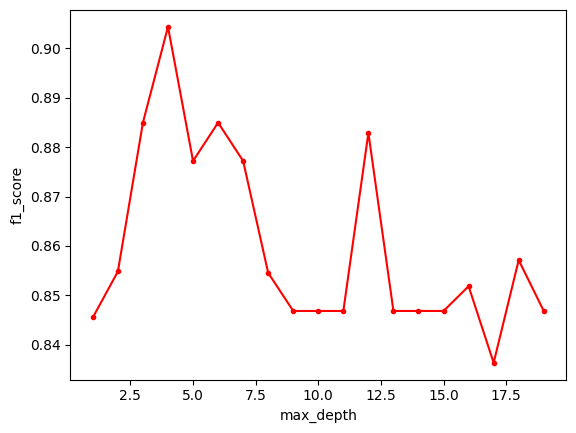

In [17]:
plt.plot(values, scores, marker='.', c='red')
plt.xlabel('max_depth')
plt.ylabel('f1_score');

In [18]:
best_param = scores.index(max(scores)) + 1
best_f1 = scores[best_param -1]

print(f'The best parameter value is: {best_param} which brings a f1 score of: {best_f1}')

The best parameter value is: 4 which brings a f1 score of: 0.9043478260869566


In [19]:
# Concatenate validation and test
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

In [20]:
# Define model with best value for max depth
model_prod = ensemble.RandomForestClassifier(n_estimators=100, max_depth=best_param, random_state=1, max_features='sqrt', n_jobs=-1)

# Train
model_prod.fit(X_train, y_train)

# Performance
yhat_test = model_prod.predict_proba(X_test)
yhat_test = yhat_test[:, 1]

# 3. ROC Curve

In [21]:
fpr, tpr, th = metrics.roc_curve(y_test, yhat_test)

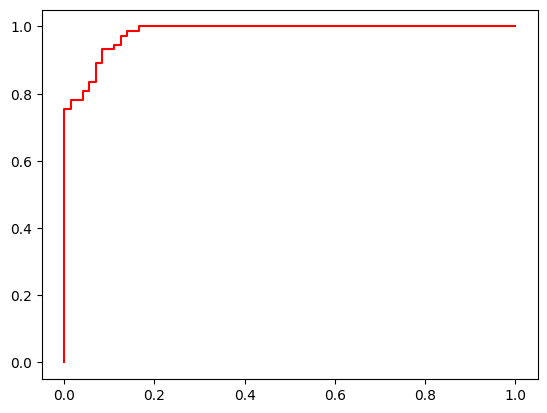

In [22]:
# Plot Roc Curve
plt.plot(fpr, tpr, c='red')

In [23]:
# Use euclidian distance to find the distances from tpr/fpr until to 1 intersection
distances = np.sqrt(((1 - tpr)**2) + (fpr ** 2))

# Find the best threshold
best_th = th[np.argmin(distances)]
print(f'Best Threshold: {best_th}')

Best Threshold: 0.6949390976419167


In [24]:
# New yhat test
yhat_test = (yhat_test >= best_th).astype(int)

acc = metrics.accuracy_score(y_test, yhat_test)
f1 = metrics.f1_score(y_test, yhat_test)

print(f'Model accuracy: {acc}')
print(f'Model f1 score: {f1}')

Model accuracy: 0.9241379310344827
Model f1 score: 0.9251700680272108


In [25]:
# Feature importance attribute of the model
model_prod.feature_importances_

array([0.01126113, 0.00638849, 0.05679939, 0.14457616, 0.00897159,
       0.00744802, 0.300185  , 0.02132854, 0.06793018, 0.01132033,
       0.3577889 , 0.00600227])

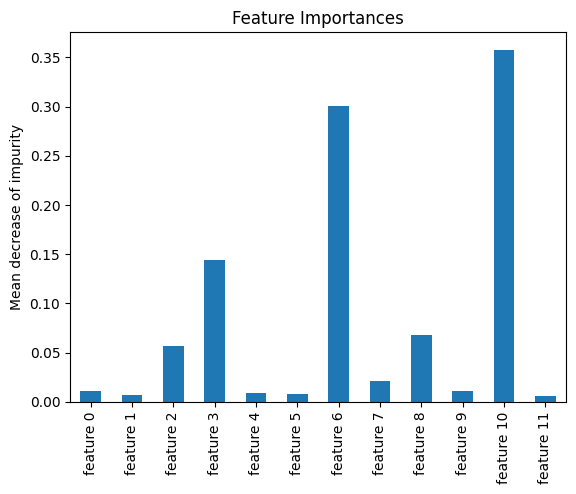

In [26]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = model_prod.feature_importances_

forest_imp = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()

forest_imp.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Mean decrease of impurity")
plt.show()